**AI PHASE 3 & 4 PROJECT**

# ***AI BASED DIABETES PREDICTION SYSTEM***

SUBMITTED BY 
     
      
      

*  **J.GOPHISHA**
*  **GOVERNMENT COLLEGE OF ENGINEERING TIRUNELVELI(9508)**
*  **950821106018**

# 1.  **import libraries**

In [43]:
#import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2.  **Load the dataset**

In [44]:
#Reading the dataset
df = pd.read_csv("/kaggle/input/diabetes-predictionsys/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 3.  **Analysis the dataset**

In [45]:
#columns available in our dataset
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [46]:
#Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [47]:
#more about the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# 4.  **Clean the data**

*Clean the data after analyse the  null , impossible value and duplicated value*

In [48]:
#analyse the null and duplicated values
print(f'Duplicated rows are: \n { df.duplicated().sum()} \n \n \n Null values per column are: \n {df.isnull().sum()}\n \n \n Zero values per column are: \n {(df == 0).sum()} , \n \n \n data types of each column is: \n {df.dtypes}  ')

Duplicated rows are: 
 0 
 
 
 Null values per column are: 
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
 
 
 Zero values per column are: 
 Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64 , 
 
 
 data types of each column is: 
 Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         

In [49]:
#analyse the impossible values
impossible_values = (df["Glucose"] == 0) | (df["BloodPressure"] == 0) | (df["SkinThickness"] == 0) | (df["Insulin"] == 0) | (df["BMI"] == 0)
impossible_values.sum()

376

*Replace the null value with median value*

In [50]:
#replace the null value with median value

lst=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in lst:
    df[i].replace(0, np.nan, inplace=True)
    df[i].fillna(df[i].median(), inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


# **5.Visualize the dataset**

***After clean the data visualize the data distribution by plotting it as histogram***

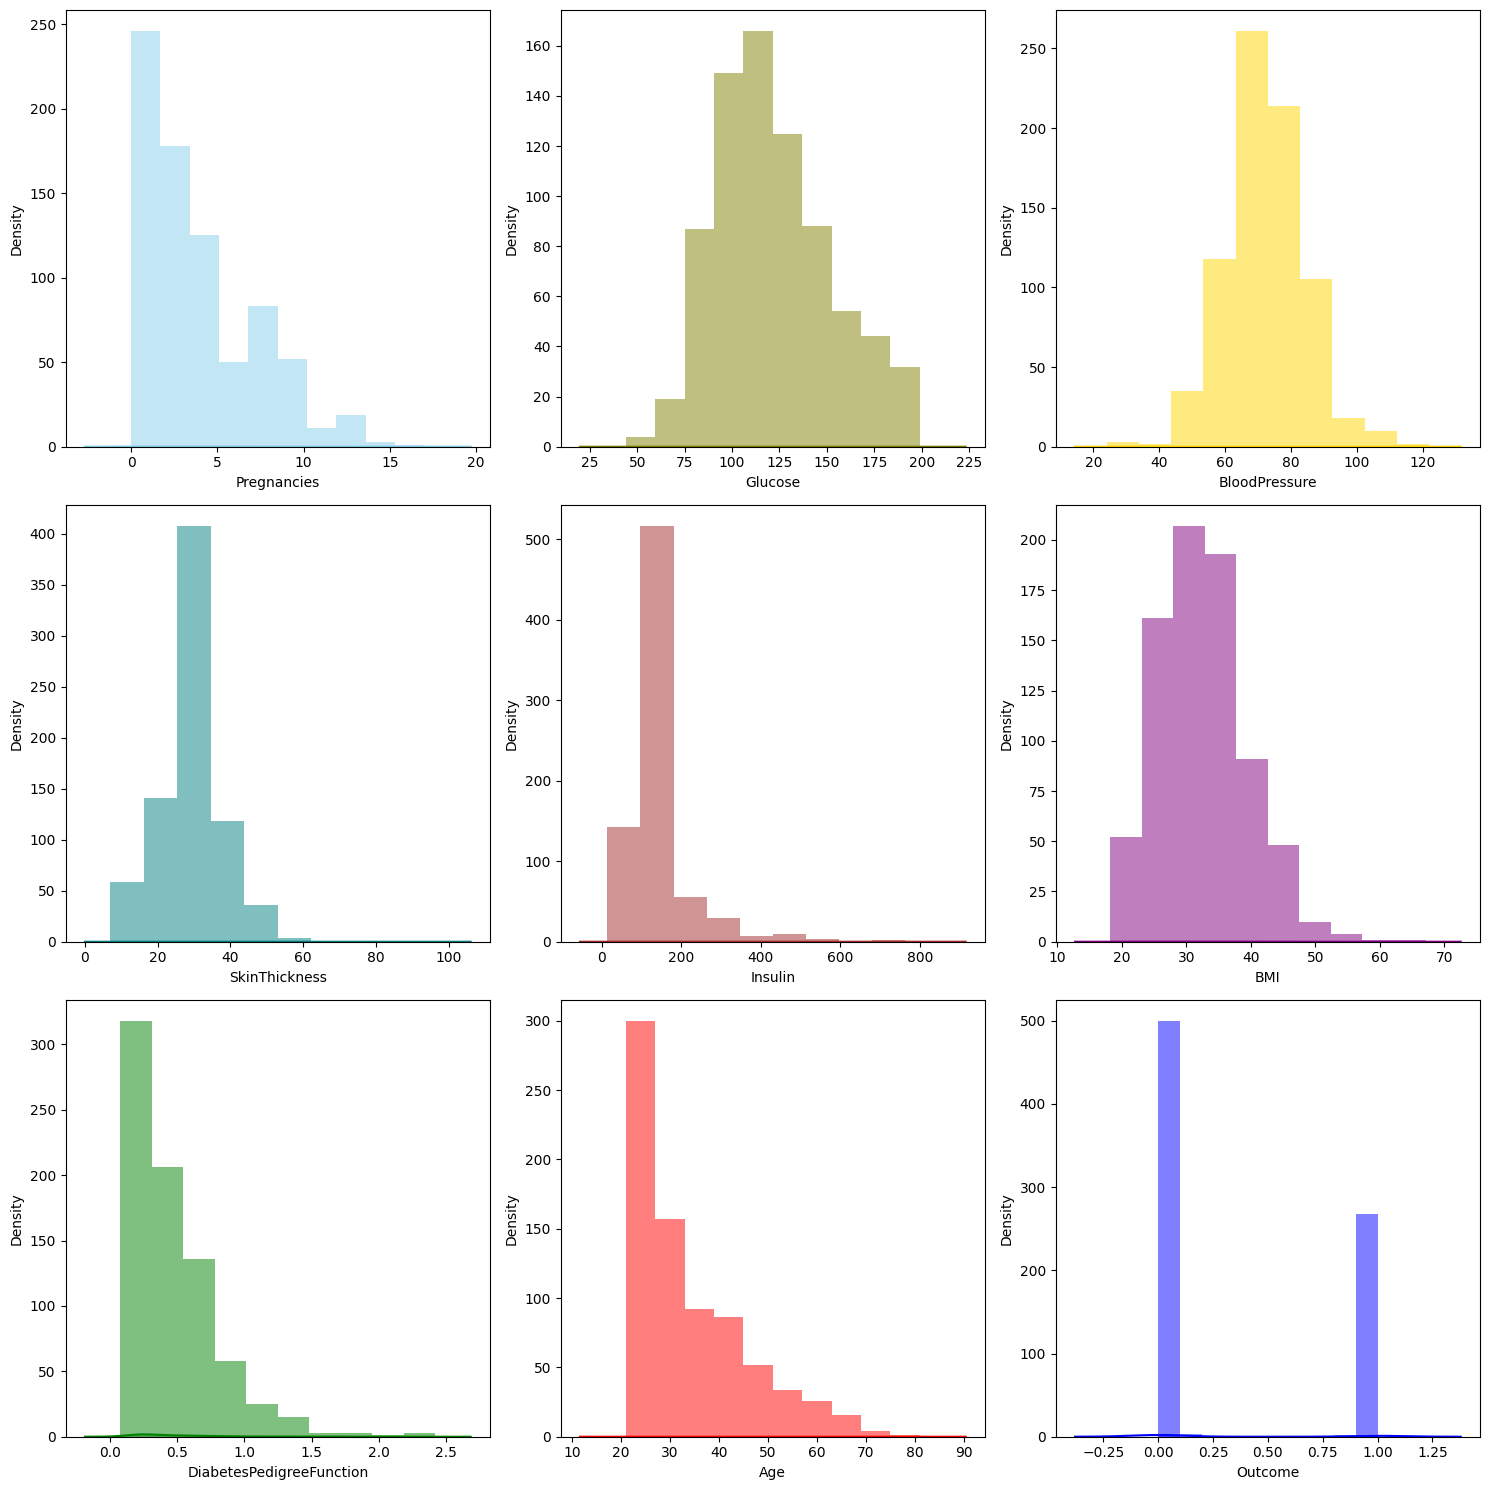

In [51]:
lst1=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
lst_col=['skyblue','olive','gold','teal','brown','purple','green','red','blue']
f, axes = plt.subplots(3, 3, figsize=(15, 15), sharex=False) # Set up the matplotlib figure
axes = axes.flatten()  # Plot a simple histogram with binsize determined automatically
for ax,k,m in zip(axes,lst1,lst_col):
    ax.hist(df[k], color=m, bins=10, alpha=0.5)
    sns.distplot(df[k], color=m, ax=ax)
plt.tight_layout() 

**Plotting Null Count Analysis Plot**

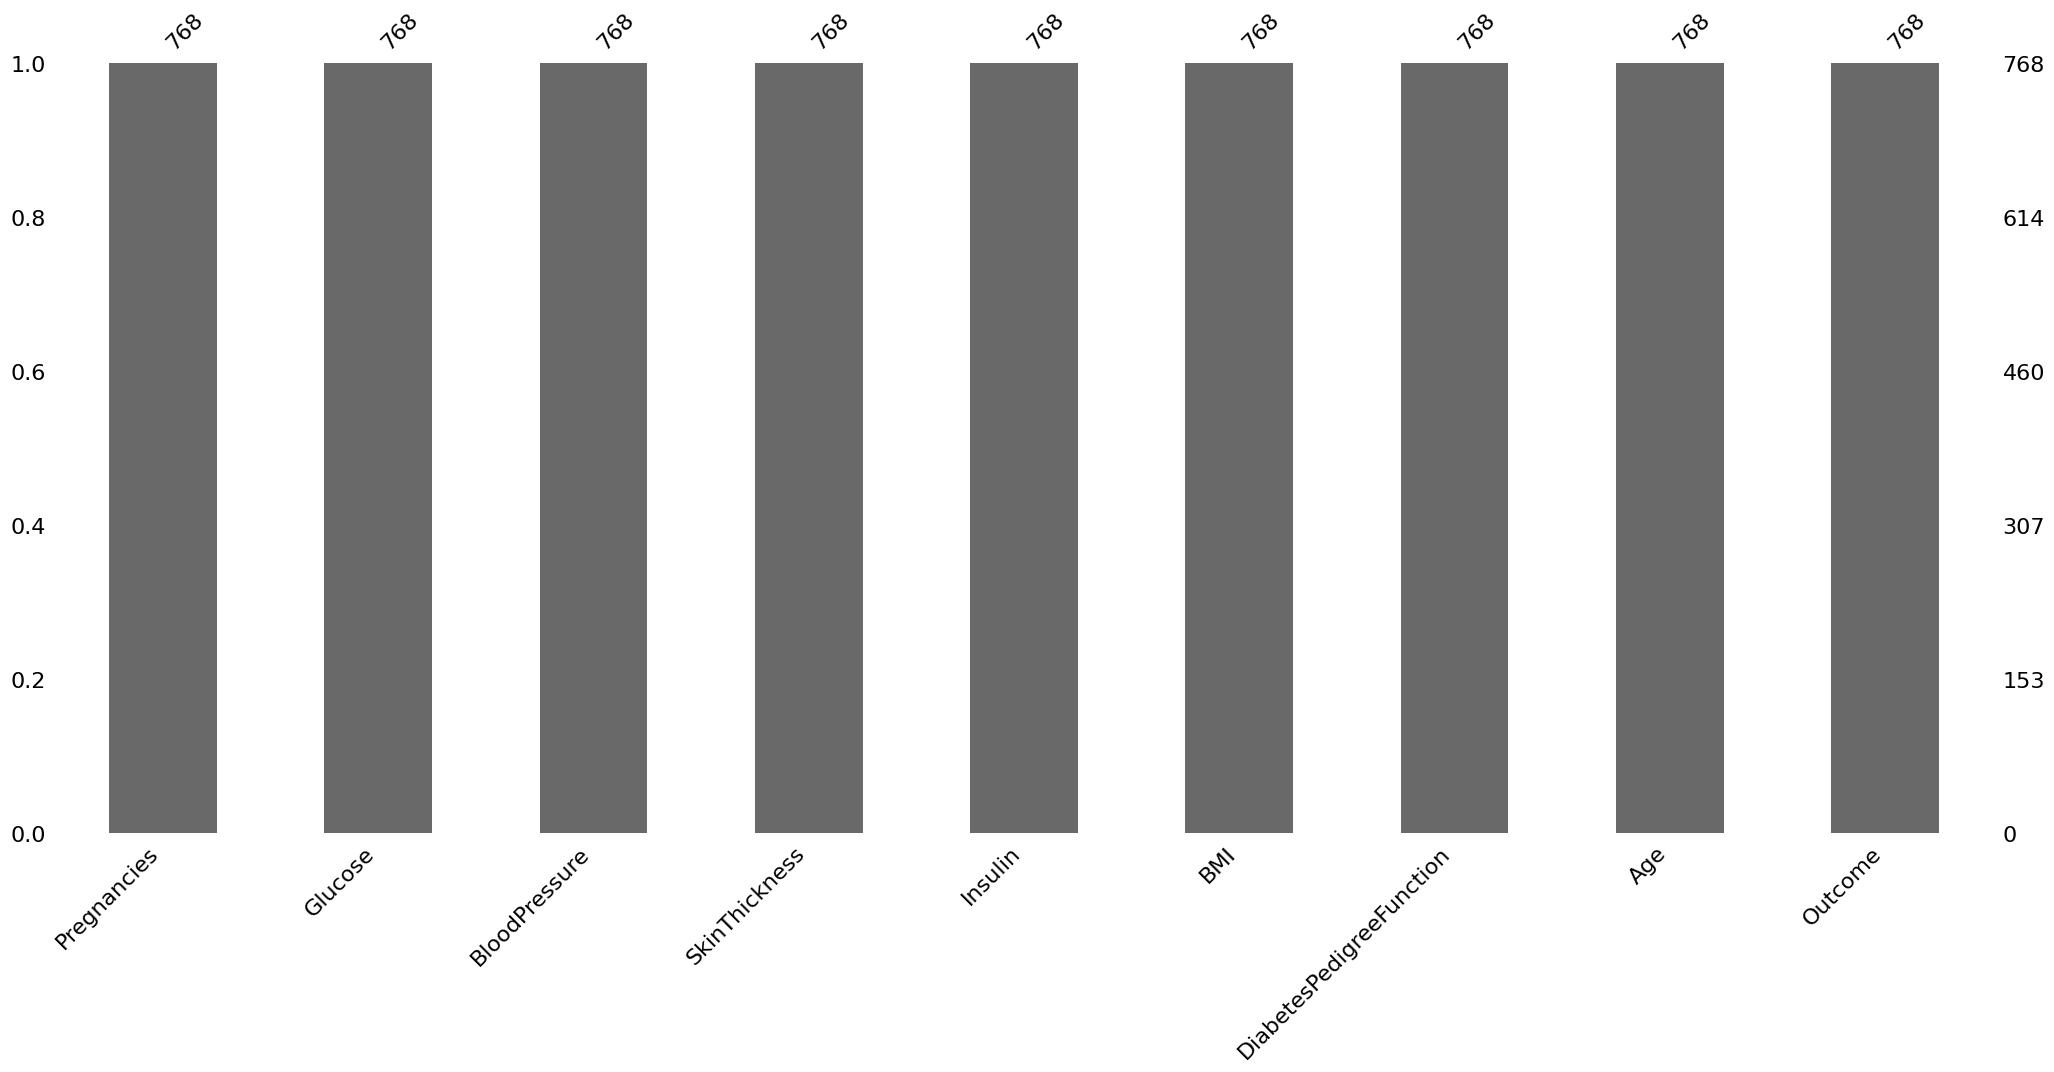

In [52]:
import missingno as msno
p = msno.bar(df)

*Inference: Now in the above graph also we can clearly see that there are no null values in the dataset.*

***check that how well our outcome column is balanced***

dataset is completely imbalanced in fact the number of patients who are diabetic is half of the patients who are non-diabetic

Outcome
0    500
1    268
Name: count, dtype: int64


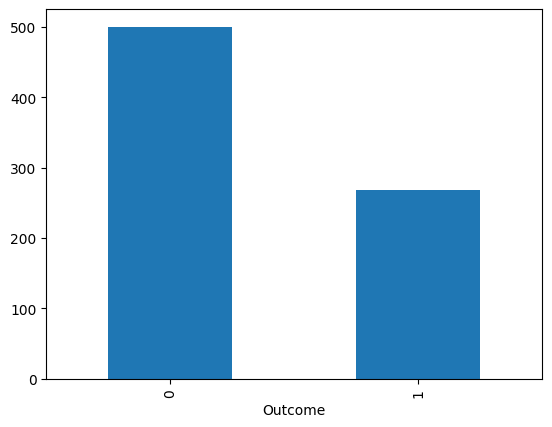

In [53]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(df.Outcome.value_counts())
p=df.Outcome.value_counts().plot(kind="bar")

Interference:dataset is completely imbalanced in fact the number of patients who are diabetic is half of the patients who are non-diabetic

* # **Visualization of Outliers**

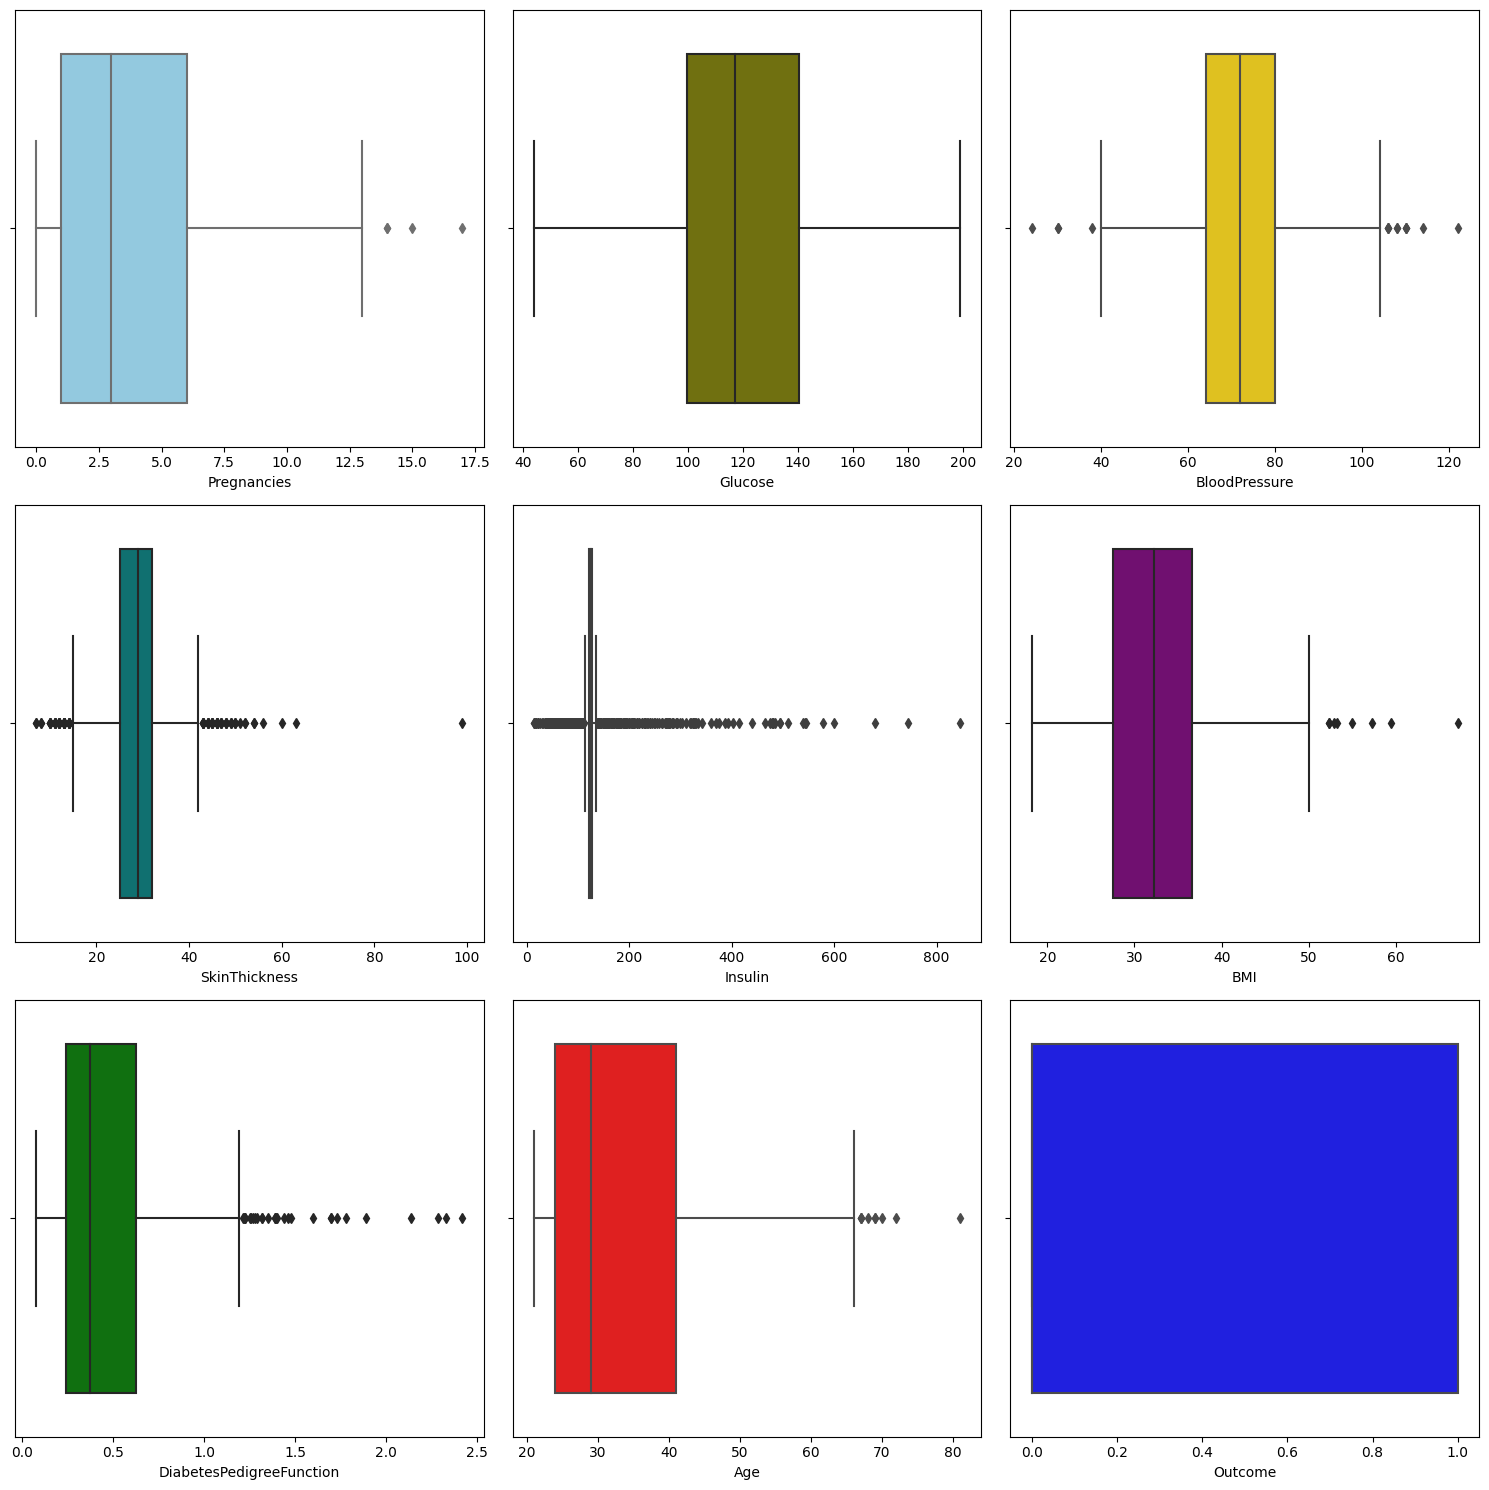

In [54]:
# Generate a box plot for each feature
lst1=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
lst_col=['skyblue','olive','gold','teal','brown','purple','green','red','blue']
f, axes = plt.subplots(3, 3, figsize=(15, 15), sharex=False) # Set up the matplotlib figure
axes = axes.flatten()  # Plot a simple histogram with binsize determined automatically
for ax,k,m in zip(axes,lst1,lst_col):
    sns.boxplot(data=df, x=k, color=m, ax=ax)
plt.tight_layout()  
plt.show()

* #  Check the Relationship Between Variables

Then we wanna check the relationships between the different variables(columns). This can provide insights into which variables are strongly or weakly associated with each other.

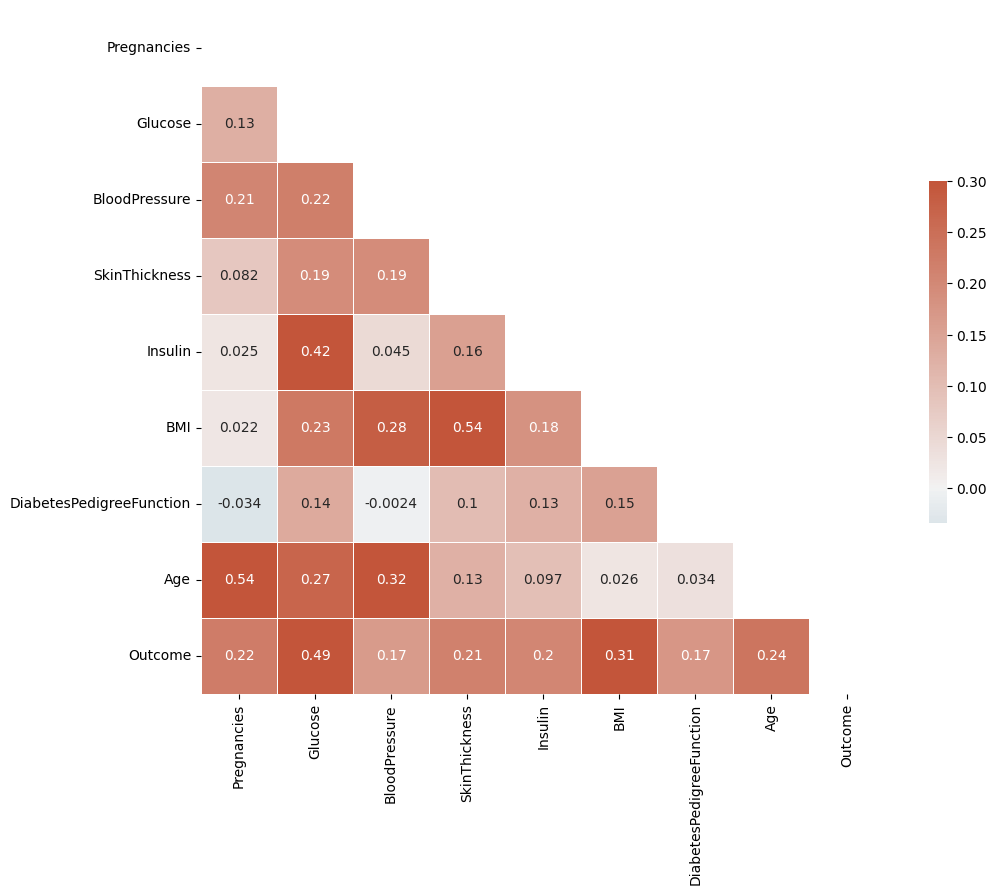

In [55]:
corr = df.corr() # Compute the correlation matrix
mask = np.triu(np.ones_like(corr, dtype=bool)) # Generate a mask for the upper triangle
f, ax = plt.subplots(figsize=(11, 9)) # Set up the matplotlib figure
cmap = sns.diverging_palette(230, 20, as_cmap=True) # Generate a custom diverging colormap
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True) # Draw the heatmap with the mask and correct aspect ratio
plt.tight_layout()

Interference:
The correlation coefficient values range from -1 to 1. If the correlation coefficient is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.
Glucose, Age and BMI are moderately correlated with Outcome.
Pregnancies and Age show a strong correlation.


* # Pairwise Variable Relationship

**This can be very helpful to understand how the variables interact with each other and identify any potential patterns or trends in the data.**

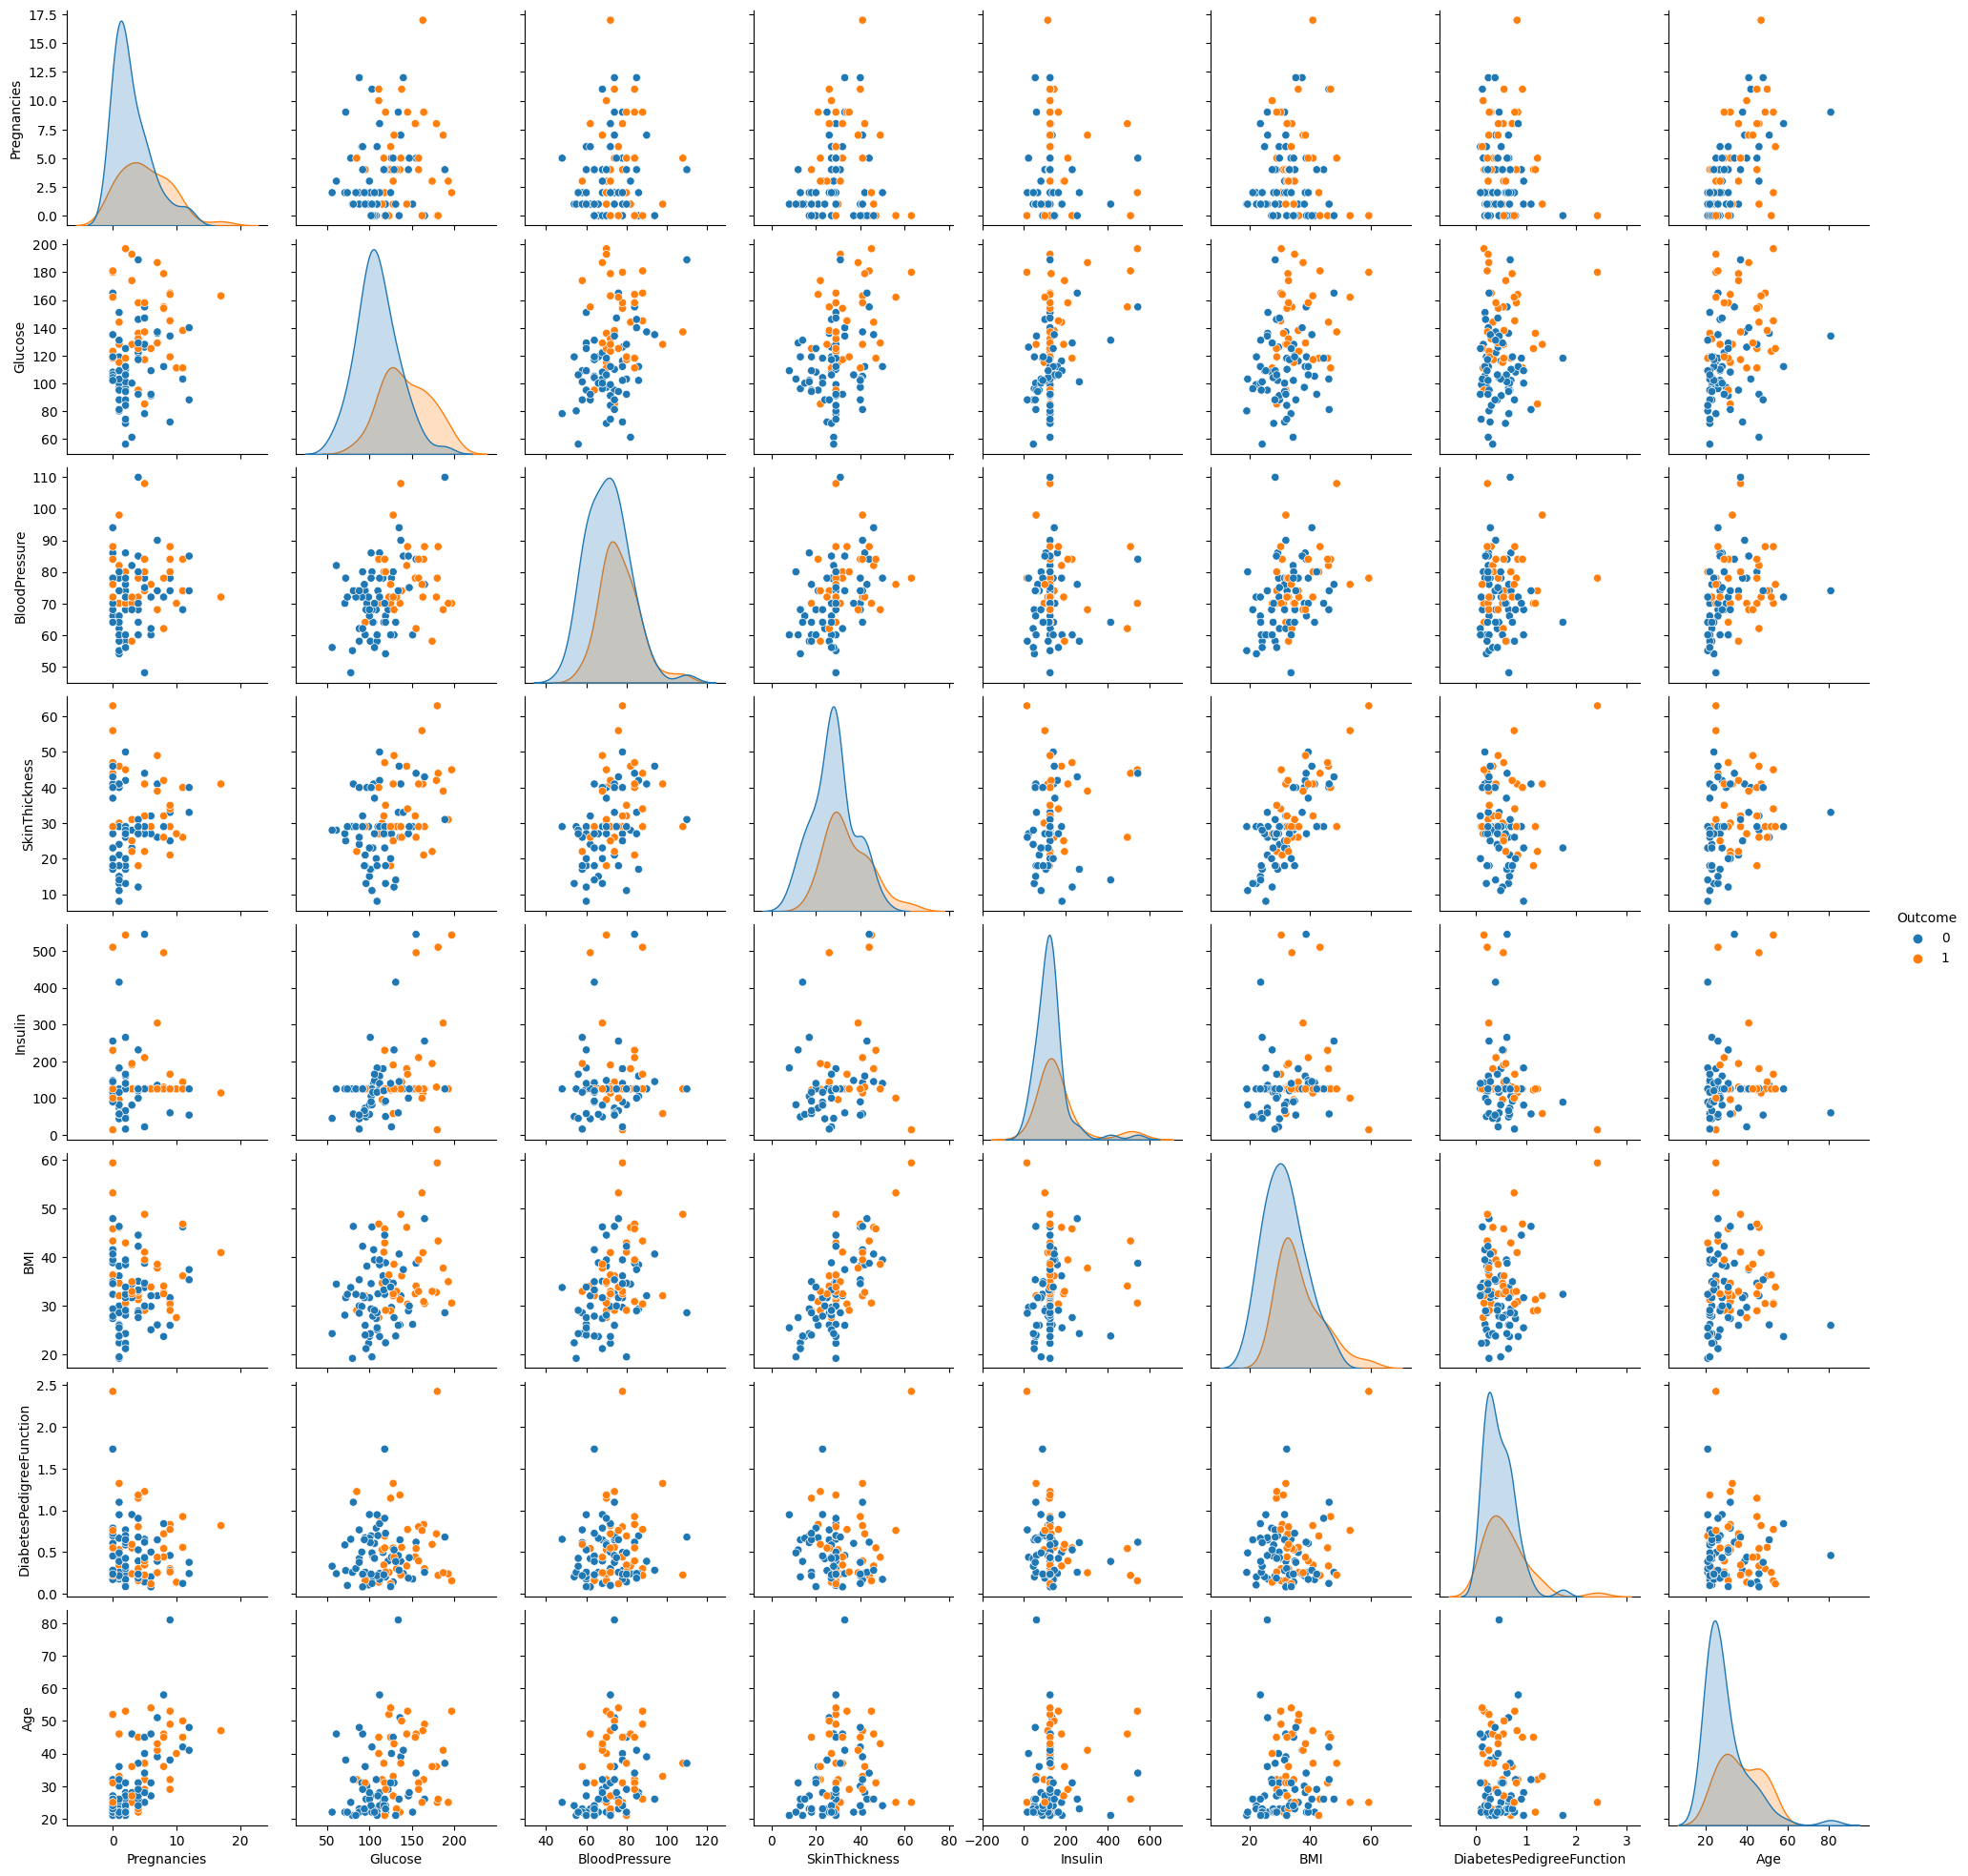

In [56]:
# We'll use a sample of the data to make the pairplot faster to generate
df_sample = df.sample(100, random_state=1)

# Create a pairplot
sns.pairplot(df_sample, hue="Outcome")
plt.show()

# **6.Split the data**

**we need to split the data into a training set and a test set. This allows us to evaluate how well our model generalizes to unseen data. We'll use 80% of the data for training and 20% for testing.**

In [57]:
from sklearn.model_selection import train_test_split
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)# Split the data into a training set and a test set
X_train.shape, X_test.shape

((614, 8), (154, 8))

# **7.Data Transformation**

**Transform data as needed, for example, scaling**

**a)Before Scaling**

In [58]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


**b)After Scaling**

**Scaled it by trained model**

In [59]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Initialize the scaler
scaler.fit(X_train) # Fit the scaler to the training data
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)
pd.DataFrame(X_train_scaled, columns=['Pregnancies', 
'Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']).head() 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.526397,-1.256881,-0.018995,0.034298,-0.175620,-0.007450,-0.490735,-1.035940
1,1.588046,-0.326051,0.808174,-0.560583,-0.175620,-0.599092,2.415030,1.487101
2,-0.828460,0.571536,-2.169636,-1.155463,-0.652193,-0.526941,0.549161,-0.948939
3,-1.130523,1.302903,-1.838768,0.034298,-0.175620,-1.508200,-0.639291,2.792122
4,0.681856,0.405316,0.642740,0.986106,2.604392,1.998360,-0.686829,1.139095


**Scaled it by test model**

In [60]:
X_test_scaled = scaler.transform(X_test)
pd.DataFrame(X_test_scaled, columns=['Pregnancies', 
'Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']).head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.681856,-0.791466,-1.177033,0.510202,0.561935,0.237865,-0.116372,0.878091
1,-0.526397,-0.326051,0.229156,0.391226,-0.175620,0.483180,-0.954231,-1.035940
2,-0.526397,-0.459026,-0.680731,0.034298,-0.175620,-0.223904,-0.924520,-1.035940
3,1.285983,-0.492270,0.642740,0.034298,-0.175620,-1.118582,1.149329,0.095078
4,0.983919,0.471804,1.469910,0.034298,-0.175620,-0.353777,-0.770021,1.487101


8. # **BUILDING THE ML MODEL**

scaling help our ML model to give a better result.

In [61]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
def fit_and_evaluate(model):# Define a function to fit a model 
    model.fit(X_train_scaled, y_train)  # Fit the model
    train_preds = model.predict(X_train_scaled) # Make predictions on the training set and compute the accuracy
    train_acc = accuracy_score(y_train, train_preds)
    test_preds = model.predict(X_test_scaled) # Make predictions on the test set and compute the accuracy
    test_acc = accuracy_score(y_test, test_preds)
    return train_acc, test_acc
res=[]
models=[LogisticRegression(random_state=42),DecisionTreeClassifier(random_state=42),RandomForestClassifier(random_state=42),SVC(random_state=42)]
for i in models:
    res.append(fit_and_evaluate(i))
for mod,result in zip(models,res):
    print(f'train and test accuracy of {mod} respectively is: \n {result} \n \n')

train and test accuracy of LogisticRegression(random_state=42) respectively is: 
 (0.7703583061889251, 0.7532467532467533) 
 

train and test accuracy of DecisionTreeClassifier(random_state=42) respectively is: 
 (1.0, 0.7142857142857143) 
 

train and test accuracy of RandomForestClassifier(random_state=42) respectively is: 
 (1.0, 0.7337662337662337) 
 

train and test accuracy of SVC(random_state=42) respectively is: 
 (0.8289902280130294, 0.7467532467532467) 
 



# **The Conclusion from Model Building**
 Random forest is the best model for this prediction since it has an accuracy_score of 0.76. 

# **9.Feature Importance**

Knowing about the feature importance is quite necessary as it shows that how much weightage each feature provides in the model building phase.

In [107]:
#Getting feature importances

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
rfc.feature_importances_

array([0.07477938, 0.24613127, 0.08375199, 0.0720271 , 0.09390982,
       0.16086506, 0.12181228, 0.1467231 ])

From the above output, it is not clear about feature is important so we will now make a visualization of the same.

<Axes: >

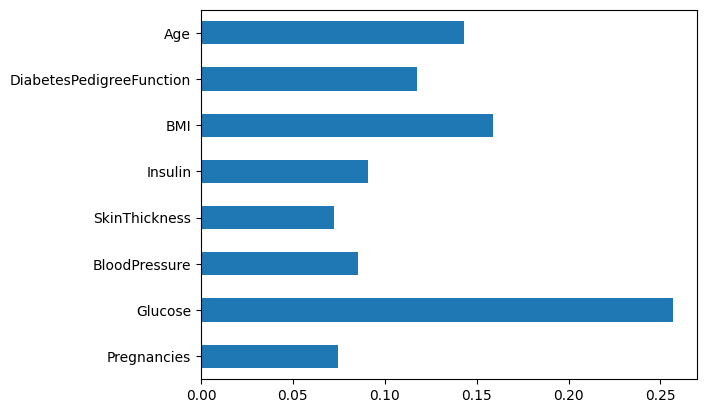

In [68]:
#Plotting feature importances
(pd.Series(rfc.feature_importances_, index=X.columns).plot(kind='barh'))

*From the above graph, it is clearly visible that Glucose as a feature is the most important in this dataset.*

# ***9.Saving Model – Random Forest***

In [108]:
import pickle
# Firstly we will be using the dump() function to save the model using pickle
saved_model = pickle.dumps(rfc)
# Then we will be loading that saved model
rfc_from_pickle = pickle.loads(saved_model)
# lastly, after loading that model we will use this to make predictions
rfc_from_pickle.predict(X_test)

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

# **10.predicting a person from the 763th row data**

In [110]:
prediction=rfc.predict([[10,101,76,48,180,32.9,0.171,63]])  # 763 th 
if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

The person is not diabetic


# ***our ai prediction successfully developed***